<a href="https://colab.research.google.com/github/AliTarek-1/Deep-Learning-Project/blob/main/Project_DeepLearning_Mobile_%26_Laptops_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

#**LOAD DATA**

In [2]:
df = pd.read_csv("/content/mobile_sales_data.csv")
df

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6.0,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1.0,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5.0,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1.0,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4.0,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45956,Laptop,Motorola,62901A55,Find consumer together pattern allow media vot...,90127,2024-03-31,2024-04-29,10.0,Emily Roth,Wilsonside,Central,i3,i3,32GB,1TB,1TB
45957,Mobile Phone,iQOO,BE14AF25,Whatever make chance pattern indicate finally ...,166145,2023-09-26,2023-11-15,6.0,Ronnie Flores,Ramosshire,Central,NaN,Snapdragon 7s,12GB,256GB,NaN
45958,Mobile Phone,Sony,211692D2,Night late board realize develop front despite...,168930,2023-12-23,2024-01-17,4.0,Stephen Irwin,Fowlerbury,North,NaN,Samsung Exynos,4GB,512GB,NaN
45959,Laptop,Motorola,A9D08319,Decade despite environment listen few artist f...,126850,2024-11-24,2024-12-31,7.0,Martha Miller,New Isaiahview,Central,i9,i9,8GB,256GB,2TB


# **DESCRIBE DATA**

In [3]:
df.shape


(45961, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45961 entries, 0 to 45960
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product                  45961 non-null  object 
 1   Brand                    45961 non-null  object 
 2   Product Code             45961 non-null  object 
 3   Product Specification    45961 non-null  object 
 4   Price                    45961 non-null  int64  
 5   Inward Date              45961 non-null  object 
 6   Dispatch Date            45960 non-null  object 
 7   Quantity Sold            45960 non-null  float64
 8   Customer Name            45960 non-null  object 
 9   Customer Location        45960 non-null  object 
 10  Region                   45960 non-null  object 
 11  Core Specification       22984 non-null  object 
 12  Processor Specification  45960 non-null  object 
 13  RAM                      45960 non-null  object 
 14  ROM                   

In [5]:
df.isnull().sum()

,0
Product,0
Brand,0
Product Code,0
Product Specification,0
Price,0
Inward Date,0
Dispatch Date,1
Quantity Sold,1
Customer Name,1
Customer Location,1


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe(include='all')

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
count,45961,45961,45961,45961,45961.000000,45961,45960,45960.000000,45960,45960,45960,22984,45960,45960,45960,22984
unique,2,20,45961,45961,NaN,732,788,NaN,37241,23783,5,8,15,6,5,4
top,Laptop,Google,943D97D1,Better shoulder rest walk paper cultural maybe.,NaN,2024-10-26,2025-01-19,NaN,Michael Williams,South Michael,West,i5,MediaTek Dimensity,4GB,256GB,2TB
freq,22984,2383,1,1,NaN,93,84,NaN,21,52,9481,2955,3343,7751,9279,5800
mean,NaN,NaN,NaN,NaN,102646.647527,NaN,NaN,5.513925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,56330.626927,NaN,NaN,2.879935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5008.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,53568.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,103155.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,151306.000000,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6.0,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1.0,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5.0,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1.0,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4.0,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB


In [9]:
df.tail()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
45956,Laptop,Motorola,62901A55,Find consumer together pattern allow media vot...,90127,2024-03-31,2024-04-29,10.0,Emily Roth,Wilsonside,Central,i3,i3,32GB,1TB,1TB
45957,Mobile Phone,iQOO,BE14AF25,Whatever make chance pattern indicate finally ...,166145,2023-09-26,2023-11-15,6.0,Ronnie Flores,Ramosshire,Central,NaN,Snapdragon 7s,12GB,256GB,NaN
45958,Mobile Phone,Sony,211692D2,Night late board realize develop front despite...,168930,2023-12-23,2024-01-17,4.0,Stephen Irwin,Fowlerbury,North,NaN,Samsung Exynos,4GB,512GB,NaN
45959,Laptop,Motorola,A9D08319,Decade despite environment listen few artist f...,126850,2024-11-24,2024-12-31,7.0,Martha Miller,New Isaiahview,Central,i9,i9,8GB,256GB,2TB
45960,Mobile Phone,Google,943D97D1,Better shoulder rest walk paper cultural maybe.,161141,2024-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.sample(5)

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
3844,Laptop,Toshiba,E35A15B0,One peace night suddenly Mr guy across debate ...,109504,2025-01-18,2025-02-19,5.0,Michaela Perez,North Brent,West,i3,i3,4GB,256GB,2TB
23769,Laptop,iQOO,BAD5288F,Term law change traditional offer key situatio...,75547,2023-07-21,2023-08-25,10.0,Allen Nguyen,South Mark,Central,i9,i9,12GB,256GB,512GB
17934,Mobile Phone,Apple,55BB452A,Line very rest success garden never quality ca...,120987,2023-11-09,2023-12-16,8.0,Adam Anderson,Obrienmouth,North,NaN,MediaTek Dimensity,8GB,128GB,NaN
23490,Laptop,Lenovo,813D3677,Factor analysis low left son develop tree idea...,87275,2024-09-16,2024-11-13,5.0,Jesse Jackson,Nolanstad,North,i9,i9,32GB,128GB,2TB
9282,Mobile Phone,Microsoft,490140FD,Apply born on near card think many sure.,192849,2024-01-22,2024-02-20,1.0,Susan Velasquez,South Joshua,East,NaN,MediaTek Helio,12GB,1TB,NaN


# **DATA CLEANING**

In [11]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


In [12]:
df['Inward Date'] = pd.to_datetime(df['Inward Date'], errors='coerce')


In [13]:
df['Dispatch Date'] = pd.to_datetime(df['Dispatch Date'], errors='coerce')


In [14]:
df.drop_duplicates(inplace=True)

# **Fill missing values**

In [15]:
df['Core Specification'].fillna("N/A(mobile)", inplace=True)


<ipython-input-15-3ba4af455f35>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Core Specification'].fillna("N/A(mobile)", inplace=True)


In [16]:
df['SSD'].fillna("N/A(mobile)", inplace=True)


<ipython-input-16-2894c6c8b29c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SSD'].fillna("N/A(mobile)", inplace=True)


In [17]:
df['RAM'].fillna("0GB", inplace=True)


<ipython-input-17-a4abb4723e25>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RAM'].fillna("0GB", inplace=True)


In [18]:
df['ROM'].fillna("0GB", inplace=True)

<ipython-input-18-1c26f7d201be>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ROM'].fillna("0GB", inplace=True)


In [19]:
df.isnull().sum()

,0
Product,0
Brand,0
Product Code,0
Product Specification,0
Price,0
Inward Date,1
Dispatch Date,1
Quantity Sold,1
Customer Name,1
Customer Location,1


# **Rename for clarity**

In [20]:
df.rename(columns={'Core Specification': 'CPU'}, inplace=True)

# **Add new engineered features**

In [21]:
df['storage Days'] = (df['Dispatch Date'] - df['Inward Date']).dt.days


In [22]:
df['Revenue'] = df['Price'] * df['Quantity Sold']

# **VALUE COUNTS (Categorical Columns)**

In [23]:
 df['Product'].value_counts()


,count
Product,
Laptop,22984
Mobile Phone,22977


In [24]:
 df['Brand'].value_counts()


,count
Brand,
Google,2383
Nokia,2369
Toshiba,2357
Samsung,2353
Sony,2350
OnePlus,2339
Apple,2331
Redmi,2328
Vivo,2311


In [25]:
 df['CPU'].value_counts()


,count
CPU,
N/A(mobile),22977
i5,2955
Ryzen 3,2927
i3,2904
i9,2898
Ryzen 7,2893
i7,2856
Ryzen 9,2777
Ryzen 5,2774


In [26]:
 df['RAM'].value_counts()


,count
RAM,
4GB,7751
32GB,7715
6GB,7660
16GB,7621
12GB,7607
8GB,7606
0GB,1


In [27]:
 df['SSD'].value_counts()

,count
SSD,
N/A(mobile),22977
2TB,5800
1TB,5766
256GB,5761
512GB,5657


# **AGGREGATES (Numeric Columns)**

In [28]:
df['Price'].agg(['min', 'max', 'mean'])

,Price
min,5008.000000
max,199999.000000
mean,102646.647527


In [29]:
df['Quantity Sold'].agg(['min', 'max', 'mean'])

,Quantity Sold
min,1.000000
max,10.000000
mean,5.513925


In [30]:
df['Revenue'].agg(['min', 'max', 'mean'])

,Revenue
min,5.181000e+03
max,1.998850e+06
mean,5.654475e+05


In [31]:
df['storage Days'].agg(['min', 'max', 'mean'])

,storage Days
min,1.000000
max,60.000000
mean,30.588664


# **FILTER BY SPECIFIC BRAND (Example: Dell)**

In [32]:
df[df['Brand'].str.contains("Dell", case=False)]

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,CPU,Processor Specification,RAM,ROM,SSD,storage Days,Revenue
6,Mobile Phone,Dell,14932CAE,Could before almost wind couple evening perfor...,11670,2023-10-10,2023-10-16,6.0,Nicole Gonzalez,South Miguel,North,N/A(mobile),Apple A-Series,16GB,256GB,N/A(mobile),6.0,70020.0
34,Mobile Phone,Dell,BDAB9D30,Thus his however large suddenly analysis recog...,104292,2023-10-28,2023-11-30,8.0,Gary Williams,Mitchellton,North,N/A(mobile),Snapdragon 8 Gen,32GB,512GB,N/A(mobile),33.0,834336.0
74,Mobile Phone,Dell,202F0160,When pattern degree brother oil really one col...,140787,2024-10-14,2024-12-07,10.0,Elizabeth Martinez,Lake Victoriaborough,West,N/A(mobile),Samsung Exynos,8GB,64GB,N/A(mobile),54.0,1407870.0
152,Laptop,Dell,AE9EFC43,Professional street can discuss news evidence ...,65217,2025-02-24,2025-03-19,1.0,Maria Hopkins,South William,East,Ryzen 3,Ryzen 3,16GB,1TB,512GB,23.0,65217.0
191,Laptop,Dell,10621027,Enter vote social play culture per operation e...,186932,2024-02-19,2024-04-19,9.0,Christine Schwartz,Lake Thomasberg,Central,i9,i9,12GB,1TB,256GB,60.0,1682388.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45870,Laptop,Dell,948C5B39,Car every thousand result region all TV about ...,186412,2025-02-28,2025-03-10,1.0,Cynthia Wells,West Catherine,South,Ryzen 9,Ryzen 9,12GB,1TB,256GB,10.0,186412.0
45912,Laptop,Dell,8435F6E6,Science prove close treat about yourself drive...,41474,2024-04-28,2024-05-19,5.0,Alejandro Haley,Lake Darlene,South,i7,i7,16GB,512GB,1TB,21.0,207370.0
45924,Laptop,Dell,0EE88004,Structure them wide card job country buy skill...,39922,2024-02-24,2024-04-03,5.0,Julian Barry,West Amandafort,North,Ryzen 9,Ryzen 9,16GB,64GB,256GB,39.0,199610.0
45935,Laptop,Dell,87B4B99D,Stuff exist anything simply increase series re...,33615,2024-09-01,2024-09-09,4.0,Jeffrey Jones,Joanburgh,South,i9,i9,32GB,512GB,2TB,8.0,134460.0


# **VISUALIZATION**

In [33]:
sns.set(style="whitegrid")
custom_palette = sns.color_palette("pastel")

 #Product Count Plot

<ipython-input-34-cdcbd50b5457>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Product', palette=custom_palette)
<ipython-input-34-cdcbd50b5457>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x='Product', palette=custom_palette)
<ipython-input-34-cdcbd50b5457>:6: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


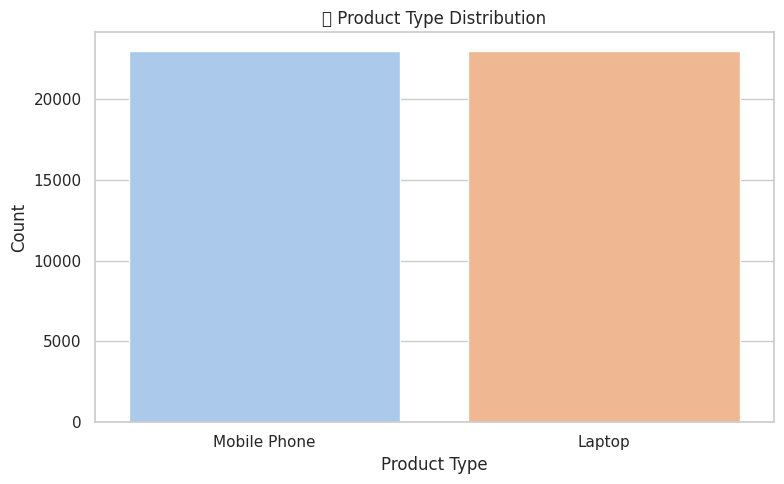

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Product', palette=custom_palette)
plt.title("🛍️ Product Type Distribution")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Brand Distribution Plot

<ipython-input-35-e09013b4072a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Brand'].isin(top_brands)], x='Brand', palette='Set2')
<ipython-input-35-e09013b4072a>:6: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


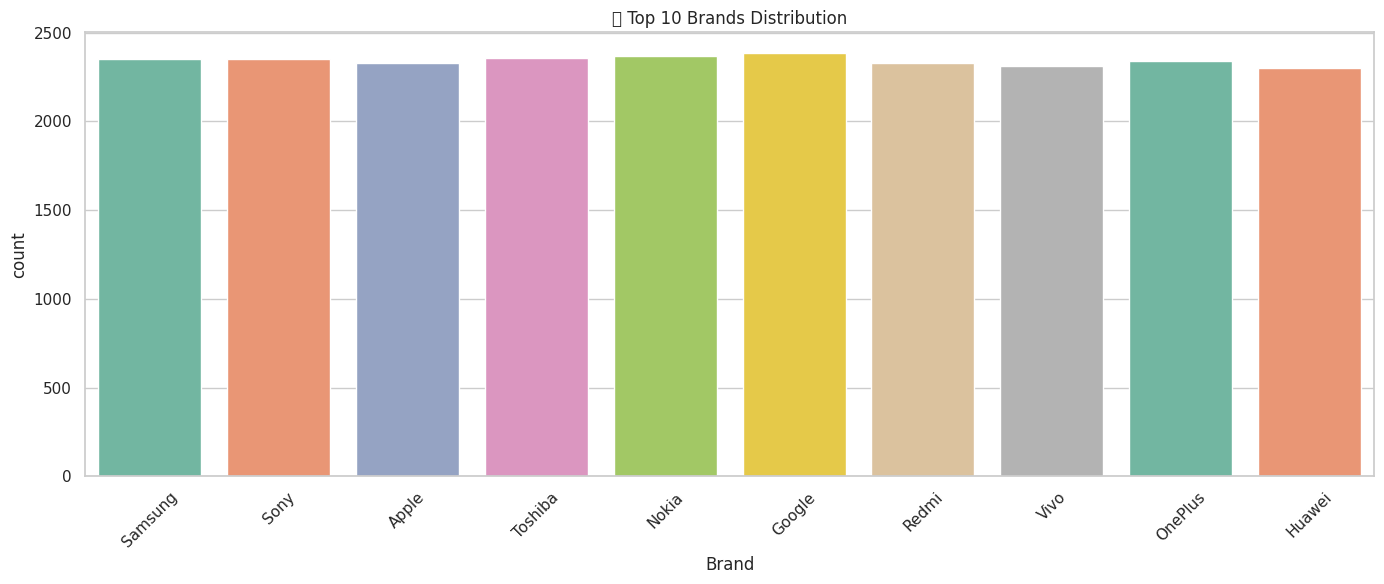

In [35]:
plt.figure(figsize=(14, 6))
top_brands = df['Brand'].value_counts().index[:10]
sns.countplot(data=df[df['Brand'].isin(top_brands)], x='Brand', palette='Set2')
plt.title("🏷️ Top 10 Brands Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Price vs Quantity Sold

<ipython-input-36-076276821c0b>:4: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


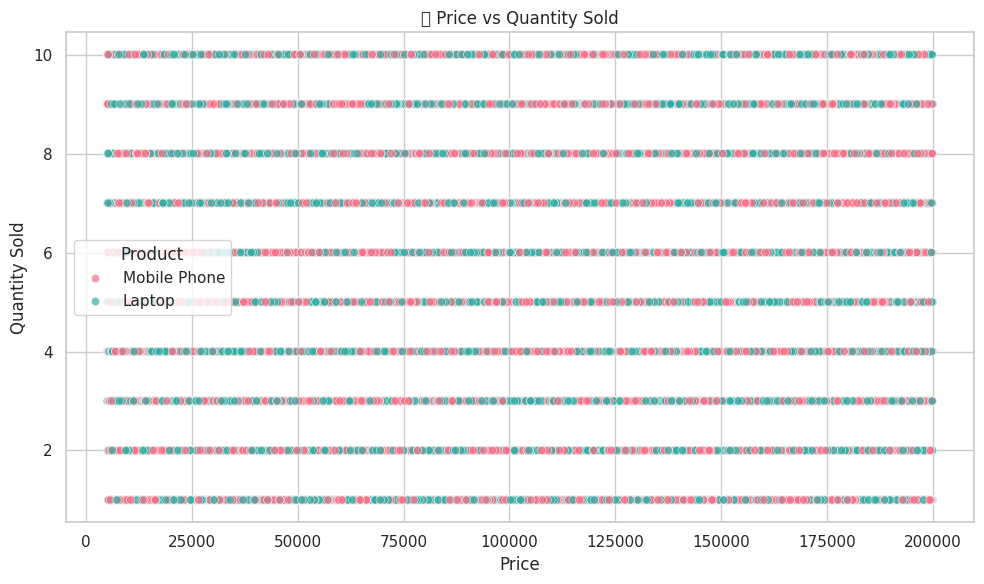

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Quantity Sold', hue='Product', palette='husl', alpha=0.7)
plt.title("💸 Price vs Quantity Sold")
plt.tight_layout()
plt.show()

<ipython-input-37-20947145063d>:5: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


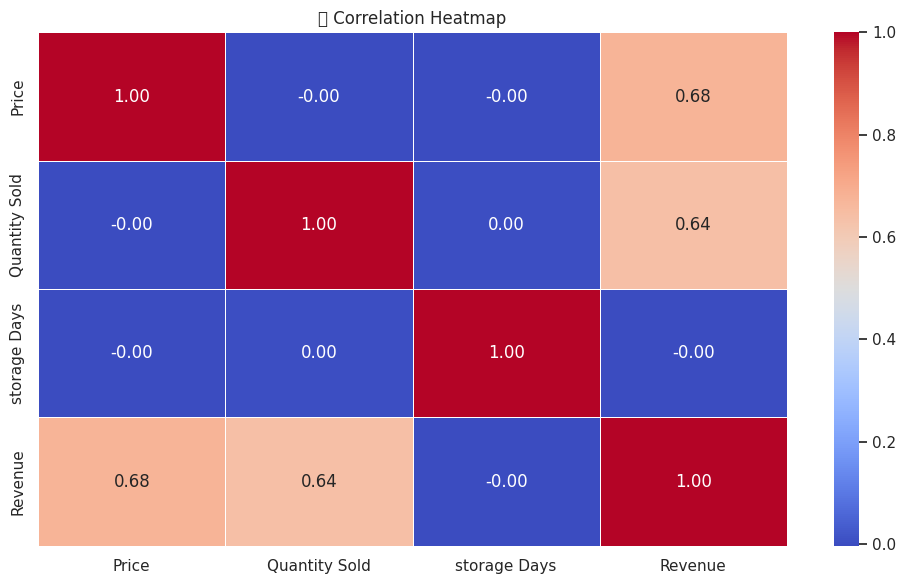

In [37]:
plt.figure(figsize=(10, 6))
corr = df[['Price', 'Quantity Sold', 'storage Days', 'Revenue']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("📊 Correlation Heatmap")
plt.tight_layout()
plt.show()

# Correlation

In [38]:
 df[['Price', 'Quantity Sold', 'storage Days', 'Revenue']].corr()

,Price,Quantity Sold,storage Days,Revenue
Price,1.000000,-0.003276,-0.003030,0.677131
Quantity Sold,-0.003276,1.000000,0.002254,0.643219
storage Days,-0.003030,0.002254,1.000000,-0.001614
Revenue,0.677131,0.643219,-0.001614,1.000000


# **Drop rows for mobile phones missing core or SSD**

In [40]:
df_cleaned = df[~((df['Product'] == 'Mobile Phone') & (df['CPU'].isna() | df['SSD'].isna()))]

# **Convert storage values from GB/TB to numeric (GB)**

In [41]:
def convert_storage(val):
    if pd.isna(val):
        return 0
    val = val.upper().strip()
    if 'TB' in val:
        return float(val.replace('TB', '')) * 1024
    elif 'GB' in val:
        return float(val.replace('GB', ''))
    return 0

for col in ['RAM', 'ROM', 'SSD']:
    df[col] = df[col].apply(convert_storage)


# **FEATURE SELECTION FOR MODELING**

In [42]:
df_model = df.drop(columns=[
    'Product Code', 'Product Specification', 'Customer Name',
    'Customer Location', 'Inward Date', 'Dispatch Date'
])

# **ENCODING CATEGORICAL VARIABLES**

In [62]:
label_encoders = {}
for col in ['Product', 'Brand', 'Region', 'CPU', 'Processor Specification']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# **Normalization**

In [63]:
scaler = StandardScaler()
df_model.dropna(inplace=True)
normalized_data = scaler.fit_transform(df_model)

# **Apply PCA (2 Components) and Visualize PCA Output**

In [64]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)
df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])


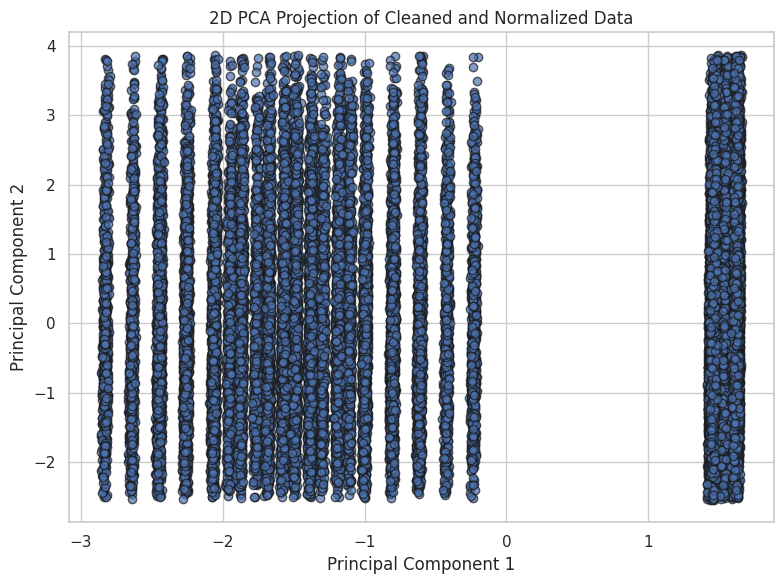

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], alpha=0.7, edgecolor='k')
plt.title("2D PCA Projection of Cleaned and Normalized Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# **TRAIN-TEST SPLIT & STANDARDIZATION**

In [50]:
X = df_pca
y = df['Quantity Sold'].loc[X.index]  # Align labels with PCA rows


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)




In [52]:
X_train_scaled = X_train
X_test_scaled = X_test


In [53]:
print("Training set:", X_train_scaled.shape)
print("Test set:", X_test_scaled.shape)

Training set: (36768, 2)
Test set: (9192, 2)


# **Part II: Training a neural network**

**MODEL CREATION FUNCTION**

In [54]:
def create_model(input_shape, num_layers=2, units_per_layer=64, dropout_rate=0.3,
                 optimizer='adam', learning_rate=0.001, l2_reg=0.01, scheduler=False):
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(input_shape,)))
    for _ in range(num_layers):
        model.add(layers.Dense(units_per_layer, activation='relu',
                               kernel_regularizer=regularizers.l2(l2_reg)))
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1))

    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate)
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate)

    model.compile(optimizer=opt, loss='mse', metrics=['mae'])

    lr_sched = callbacks.LearningRateScheduler(lambda epoch: learning_rate * 0.95**epoch, verbose=0) if scheduler else None
    return model, lr_sched

**TRAINING FUNCTION**

In [55]:
def train_model(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=50, lr_schedule=None):
    cb_list = [callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    if lr_schedule:
        cb_list.append(lr_schedule)
    return model.fit(X_train, y_train, validation_data=(X_val, y_val),
                     batch_size=batch_size, epochs=epochs, callbacks=cb_list, verbose=1)

**EVALUATION FUNCTION**

In [56]:
def evaluate_model(model, X, y, dataset_name="Test"):
    preds = model.predict(X).flatten()
    mse = mean_squared_error(y, preds)
    r2 = r2_score(y, preds)
    print(f"📊 {dataset_name} MSE: {mse:.2f}")
    print(f"📈 {dataset_name} R² Score: {r2:.2f}")
    return mse, r2

**HYPERPARAMETERS**

In [57]:
BASE_CONFIG = {
    "units_per_layer": 128,
    "dropout_rate": 0.3,
    "optimizer": "adam",
    "learning_rate": 0.001,
    "l2_reg": 0.01,
    "batch_size": 64,
    "epochs": 50
}

**MODEL TRAINING AND EVAL**

In [ ]:
model = create_model(
    input_shape=X_train_scaled.shape[1],
    num_layers=BASE_CONFIG["num_layers"],
    units_per_layer=BASE_CONFIG["units_per_layer"],
    dropout_rate=BASE_CONFIG["dropout_rate"],
    optimizer=BASE_CONFIG["optimizer"],
    l2_reg=BASE_CONFIG["l2_reg"],
    learning_rate=BASE_CONFIG["learning_rate"]
)

history = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test,
                      batch_size=BASE_CONFIG["batch_size"], epochs=BASE_CONFIG["epochs"])

predictions = evaluate_model(model, X_test_scaled, y_test)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 8.7998 - mae: 1.8560 - val_loss: 1.7120 - val_mae: 0.4762
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.1765 - mae: 0.7968 - val_loss: 0.9871 - val_mae: 0.4013
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.3621 - mae: 0.6587 - val_loss: 0.6535 - val_mae: 0.3267
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0162 - mae: 0.5898 - val_loss: 0.5880 - val_mae: 0.3646
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8537 - mae: 0.5557 - val_loss: 0.4153 - val_mae: 0.2239
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7786 - mae: 0.5347 - val_loss: 0.3878 - val_mae: 0.2312
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7416 - mae: 0.5225 - val_loss: 0.3534 - val_mae: 0.2089
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7052 - mae: 0.5064 - val_loss: 0.3748 - val_mae: 0.2659
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

**PLOT TRAINING HISTORY**

In [ ]:
def plot_history(history, label='Model'):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label=f'{label} - Train Loss')
    plt.plot(history.history['val_loss'], label=f'{label} - Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title(f'Training Curve - {label}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Vary Number of Layers**

In [ ]:
layers_results = {}
for num_layers in [2, 3, 4]:
    print(f"\n📚 Testing with {num_layers} layers")

    model, lr_sched = create_model(
        input_shape=X_train_scaled.shape[1],
        num_layers=num_layers,
        units_per_layer=BASE_CONFIG["units_per_layer"],
        dropout_rate=BASE_CONFIG["dropout_rate"],
        optimizer=BASE_CONFIG["optimizer"],
        learning_rate=BASE_CONFIG["learning_rate"],
        l2_reg=BASE_CONFIG["l2_reg"],
        scheduler=True
    )

    history = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test,
                          batch_size=BASE_CONFIG["batch_size"],
                          epochs=BASE_CONFIG["epochs"],
                          lr_schedule=lr_sched)

    test_mse, test_r2 = evaluate_model(model, X_test_scaled, y_test, "Test")
    layers_results[num_layers] = {"mse": test_mse, "r2": test_r2}
    plot_history(history, label=f"{num_layers} Layers")

**Vary Dropout Rate**

In [ ]:
dropout_results = {}
for dr in [0.2, 0.3, 0.5]:
    print(f"\n💧 Testing with Dropout Rate = {dr}")

    model, lr_sched = create_model(
        input_shape=X_train_scaled.shape[1],
        num_layers=3,
        units_per_layer=128,
        dropout_rate=dr,
        optimizer="adam",
        learning_rate=0.001,
        l2_reg=0.01,
        scheduler=True
    )

    history = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test,
                          batch_size=64, epochs=50, lr_schedule=lr_sched)

    test_mse, test_r2 = evaluate_model(model, X_test_scaled, y_test, "Test")
    dropout_results[dr] = {"mse": test_mse, "r2": test_r2}
    plot_history(history, label=f"Dropout {dr}")


**Vary L2 Regularization (weight decay)**

In [ ]:
l2_results = {}
for l2 in [0.001, 0.01, 0.1]:
    print(f"\n📏 Testing with L2 Regularization = {l2}")

    model, lr_sched = create_model(
        input_shape=X_train_scaled.shape[1],
        num_layers=3,
        units_per_layer=128,
        dropout_rate=0.3,
        optimizer="adam",
        learning_rate=0.001,
        l2_reg=l2,
        scheduler=True
    )

    history = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test,
                          batch_size=64, epochs=50, lr_schedule=lr_sched)

    test_mse, test_r2 = evaluate_model(model, X_test_scaled, y_test, "Test")
    l2_results[l2] = {"mse": test_mse, "r2": test_r2}
    plot_history(history, label=f"L2 = {l2}")


**Vary Learning Rate**

In [ ]:
lr_results = {}
for lr in [0.01, 0.001, 0.0001]:
    print(f"\n📉 Testing with Learning Rate = {lr}")

    model, lr_sched = create_model(
        input_shape=X_train_scaled.shape[1],
        num_layers=3,
        units_per_layer=128,
        dropout_rate=0.3,
        optimizer="adam",
        learning_rate=lr,
        l2_reg=0.01,
        scheduler=True
    )

    history = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test,
                          batch_size=64, epochs=50, lr_schedule=lr_sched)

    test_mse, test_r2 = evaluate_model(model, X_test_scaled, y_test, "Test")
    lr_results[lr] = {"mse": test_mse, "r2": test_r2}
    plot_history(history, label=f"LR = {lr}")
